 Basic_wk4_2023

# Recap

머신 러닝의 학습 방법은 크게 supervised learning과 unsupervised learning으로 나눌 수 있다.  
#### 1. Supervised Learning
: Classification (분류), Regression (회귀)    
#### 2. Unsupervised Learning
: Clustering (군집)

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQtLcoa9evLXfqXrohXkXfK0u7dFW1Ga9-EYw&usqp=CAU' width='400' height='220'/>

# K-Nearest Neighbor classifier

1. 설명  
: 지도 학습 알고리즘 중 하나로, 새로운 데이터가 주어졌을 때 기존 데이터 가운데 가장 가까운 k
개 이웃의 정보로 새로운 데이터를 예측하는 방법론. training set에서 single closest image를 찾는 대신에 k개의 가까운 이미지들을 찾아 투표를 통해 test image의 label을 결정하는 방식이다. 


2. Lazy model (Instance-based Learning)
: 모델을 별도로 구축하지 않아 사전 모델링이 필요 하지 않고 real-time 예측이 이루어진다.

3. combining rule - majority voting(다수결 방식), weighted voting(가중합) 방식 

4. Hyper parameter - k, distance matric
: k가 너무 작으면 overfitting, 너무 크면 underfitting 가능성 존재.
  - Distance matric  
   (A) Euclidean Distance   
   (B) Manhattan DIstance 
5. 주의점 : 반드시 normalization(정규화) 사전에 진행
   
      
<img src='https://www.researchgate.net/publication/340226275/figure/fig3/AS:873646004375556@1585304847520/KNN-classification-Algorithm-24.png' width='400' height='340'/>

## 예제

iris 데이터를 활용한 KNN 분류 실습    
It contains 150 samples of iris flowers, with 50 samples from each of three different species. The goal is to classify each flower based on its sepal length, sepal width, petal length, and petal width.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris #scikit-learn에서 제공하는 붖꽃 데이터셋

# 붖꽃 종류 데이터 불러오기
dataset = load_iris()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# target을 붖꽃의 종류로 지정
df['class'] =  dataset.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
df['class'].value_counts() 

0    50
1    50
2    50
Name: class, dtype: int64

In [3]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
# Dividing data into features and labels
X = dataset.data
y = dataset.target

In [5]:
# ratio between train data, test data = 8 : 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, random_state = 0)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# define model (KNN)
classifier = KNeighborsClassifier(n_neighbors=3)

# fit the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
#from sklearn.metrics import accuracy_score
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


In [8]:
print(y_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


## 모델 성능 평가 지표

Classifier의 정확한 성능을 판단하기 위해서는 Accuracy 외에 다른 평가지표를 같이 사용해야 한다.  
1) Condusion Matrix  
2) Precision(정밀도), Recall(재현율), Accuracy(정확도)   
3) ROC curve, AUC점수

**Element Explanation**
1. `True Positive (TP)`: The number of instances that were correctly predicted as positive 

2. `True Negative (TN)`: The number of instances that were correctly predicted as negative

3. `False Positive (FP)`: The number of instances that were incorrectly predicted as positive
4. `False Negative (FN)`: The number of instances that were incorrectly predicted as negative 
------------------

TP, TN → correct classification
- Example  
1) TP - 질병 진단을 양성으로 했는데 맞힌 경우  
2) TN - 질병 진단을 음성으로 했는데 맞힌 경우  
3) FP - 질병 진단을 양성으로 했는데 실제는 음성이였던 경우 (잘못 진단한 것)  
4) FN - 질병 진단을 음성으로 했는데 실제는 양성이였던 경우 (잘못 진단한 것)

<img src='https://miro.medium.com/v2/resize:fit:712/1*Z54JgbS4DUwWSknhDCvNTQ.png' width='400' height='240'/>

- **Optimal Threshod**
1. **Accuracy** = $TP + TN \over TP+TN+FP+FN $
  - 전체 샘플 중 맞게 예측한 샘플 수의 비율
  - scikit-learn의 `accuracy_score` function을 사용해 계산 가능. 

2. **Recall** = $TP  \over TP+FN $ or $True  Positive  \over Actual Results $
  - 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율
  - scikit-learn의 `recall_score` function을 사용해 계산 가능. 

3. **Precision** = $TP \over TP+FP $ or $True  Positive  \over Predicted Results $
  - 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수 의 비율
  - scikit-learn의 `precision_score` function을 사용해 계산 가능. 

4. **F-score** = $2* Recall * Precision \over Recall + Precision $
  - 정밀도와 재현율의 가중조화평균을 F-score라고 한다. 정밀도에 주어지는 가중치를 베타라고 한다.(위의 경우 베타=1)
  - scikit-learn의 `f1_score` function을 사용해 계산 가능. 

In [9]:
# # Accuracy
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_true, y_pred)

# # Recall
# from sklearn.metrics import precision_score
# precision = precision_score(y_true, y_pred, average='binary')

# # Precision 
# from sklearn.metrics import recall_score
# recall = recall_score(y_true, y_pred, average='binary')

# # F-score
# from sklearn.metrics import f1_score
# f1_score = f1_score(y_true, y_pred, average='binary')

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



ROC curve, AUC 에 관한 내용은 SVM에서 이어서 설명함.



# SVM (Support Vector Machine)

SVM(Support Vector Machine)은 분류 및 회귀 분석에 사용되는 supervised learning algorithm이다. 

SVM에서 알고리즘은 데이터를 여러 클래스로 구분하는 hyperplane(or decision boundary)를 만든다. hyperplane에 가장 가까운 data point를 support vector이라고 한다.
  

SVM은 선형 및 비선형 분류 문제 모두에 사용할 수 있는데, 비선형 분류 문제의 경우 kernel trick을 사용하여input data를 high dimensional space로 전환해준다.(데이터 separate 가능)

- 목적 : maximizing margin
- 장점 :   
1) Fiddle 해야하는 parameter수가 적다.   
2) outlier들에 대해 robust하다 -> noisy data 잘 다룸.

**Notation**  
$$\mathrm {Classifier :}\; h_{w, b}(x) = g(w^Tx + b) $$

- $\mathrm y \in {-1, 1} $
- $g(z)=1$   if $z\ge0$,   
and $g(z) = -1$ otherwise

Optimal margin calssifier (linearly separable case)

###Functional margin
 
   

 예측값과 decision boundary 간의 거리

<img src='https://miro.medium.com/v2/resize:fit:1200/1*HXCBO-Wx5XhuY_OwMl0Phw.png' width='400' height='240'/>  
$$h_\theta(x) = g(\theta^Tx)$$

$\theta^Tx \ge 0$이라면 1, 그렇지 않으면 0이라고 예측한다.   
     
$y^{(i)} = 1$이면 hope that $\theta^Tx \gg 0$  
$y^{(i)} = 0$이면 hope that $\theta^Tx \le 0$


<img src='https://www.jeremyjordan.me/content/images/2017/06/Screen-Shot-2017-06-20-at-8.52.39-AM.png' width='600' height='340'/> 사진1


**Functional margin of hyperline**
$$\mathrm \; \hat{\gamma}^{(i)}(x) = y^{(i)}(w^Tx^{(i)} + b) $$
  
만약 confident한 prediction을 하고 싶다면 $y^{(i)}$=1이라면 functional margin이 커지기 위해서는 $(w^Tx^{(i)} + b) $값이 큰 양의 값이어야 한다. 반대로 음이라면 큰 음의 값을 갖도록 해야한다. 

- 특징 :  
우리는 데이터가 선형 분류가 가능하다고 가정하면, w, b를 multiply해서 functional margin을 올릴 수 있다.
또한 우리는 $\hat{\gamma}$을 각 학습 데이터들의 마진들중 최솟값으로 선택한다.  
$$ \hat{\gamma} = \underset{i=1, 2, ...n}{min \hat{\gamma}^{(i)}} $$

### 2. Geometric margin

가장 가까운 datapoint와 decision boundary 사이의 거리.
위의 사진1을 참고하면
점 B는 다음과 같이 작성 가능하다.  
$$ x^{(i)} - {\gamma}^{(i)} \frac{w}{\parallel w \parallel} $$
  
     
또한 결정 경계에서 y값은 0이되므로 일반화된 식으로 표현하면 다음과 같다.
$$   {\gamma}^{(i)} =  y^{(i)}(\frac{w^Tx^{(i)} + b}{\parallel w \parallel}) =   y^{(i)}({(\frac {w} {\parallel w \parallel})^Tx^{(i)} + \frac {b}{\parallel w \parallel}}) $$

우리는 geometric margin을 최대화할 수 있는 w, b를 찾고자.
$$ min_{w,b}\frac{1}{2}||{w}||^2$$
 $$y^{(i)}(w^Tx^{(i)} + b) \ge 1, i=1,...,n$$

위의 값을 최소화 하는 방식은 나중에 optimal margin classifier가 high dimensional space에서도 효율적으로 작동할 수 있게 해주는 kernel을 사용하도록 허용해준다는 장점이 있다.



## ROC curve, AUC (Receiver Operating Characteristic, Area Under the Curve)

- **ROC(Receiver Operator Characteristic) curve**는 다양한 threshold에 대한 이진분류기의 성능을 한번에 표시한 것이다.scikit-learn에서는 `roc_curve`를 활용하면 구할 수 있다.

- **AUC(Area Under the Curve)**는 간단하게 ROC curve의 **면적**을 나타낸다고 할 수 있는데, scikit-learn에서는 `auc`, `roc_auc_score` 를 활용하면 구할 수 있다.

이들을 사용하면 classification에서 여러 임계값 설정에 대한 모델의 성능을 구할 수 있게 된다.

(150, 804)
(150, 3)


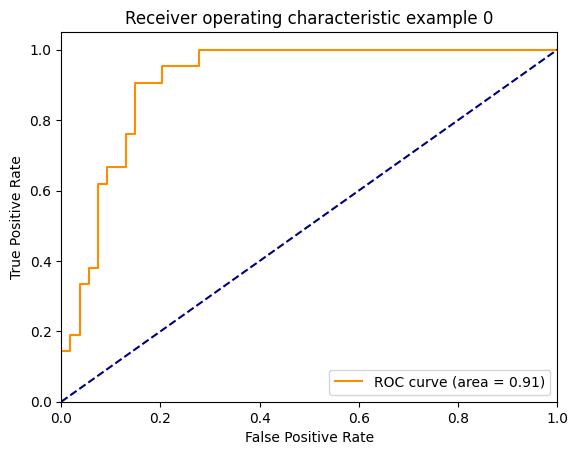

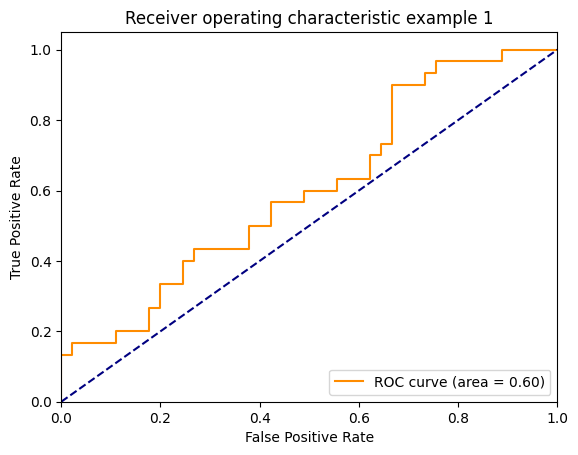

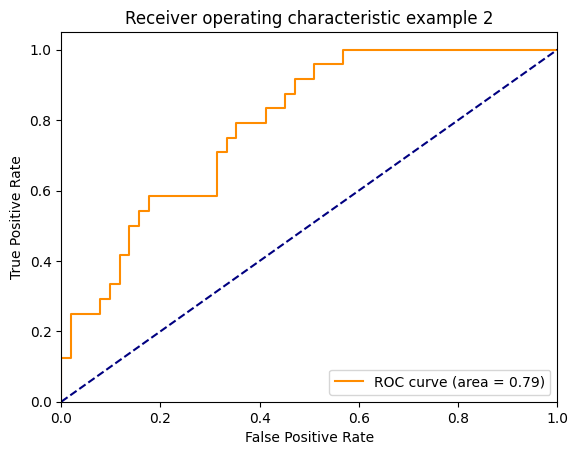

0.7677222740948232


In [13]:
# 붗꽃 종류 데이터셋을 활용해 ROC CURVE를 관찰해보고자한다.
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

dataset = datasets.load_iris()
X_data = dataset.data
y_data = dataset.target

#클래스 별로 이진화 (binarize)
y_data = label_binarize(y_data, classes=[0, 1, 2])
n_classes = y_data.shape[1]

# 문제를 어렵게 만들기 위해 노이즈를 섞음.
random_state = np.random.RandomState(0)
n_samples, n_features = X_data.shape
X_data = np.c_[X_data, random_state.randn(n_samples, 200 * n_features)]
print(X_data.shape) #(150, 804)
print(y_data.shape) #(150, 3)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.5, random_state=0)

# Learn to predict each class against the other
model = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))

model.fit(X_train, y_train)

# Compute ROC curve and ROC area for each class
y_score = model.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_score[:, i])

#import matplotlib.pyplot as plt
for class_i in range(n_classes):
  plt.plot(fpr[class_i], tpr[class_i],color='darkorange', label='ROC curve (area = {:0.2f})'.format(roc_auc[class_i]))
  plt.plot([0, 1], [0, 1],color='navy', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example %d' % class_i)
  plt.legend(loc="lower right")
  plt.show()
  
print(roc_auc_score(y_test, y_score, multi_class='raise'))

### 예제

In [14]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

dataset = load_iris()

# Dividing data into features and labels
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, random_state = 0)

#define model (SVM)
classifier = SVC(kernel = 'linear', random_state = 0)
#Fit the model 
classifier.fit(X_train, y_train)

#Make the prediction
y_pred = classifier.predict(X_test)


In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix")
print(cm)
print()
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

confusion matrix
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]

Accuracy: 98.18 %


# 군집 (Clustering)

## 비지도 학습



**비지도 학습**은 타깃이 없을때 사용하는 머신러닝 알고리즘이다. 군집은 이렇게 비슷한 샘플끼리 하나의 그룹으로 모으는 대표적인 비지도 학습 작업이며 군집 알고리즘으로 모은 샘플 그룹을 **클러스터**라고 한다.또한 각 클러스터의 중심을 Centroid라고 부른다. 가장 대표적인 알고리즘으로는 K-means와 PCA가 있다.
  


##K-평균 알고리즘


### Process
0) k 결정  
1) 초기 Centroid 선택(랜덤, 수동 등)    
2) 각 샘플에서 가장 가까운 cluster center을 찾아 해당 cluster의 sample로 지정  
3) 클러스터에 속한 샘플의 평균값으로 cluster center을 변경  
4) 중심이 변하지 않을때까지 2번부터 다시 반복 진행함.


<img src='https://qph.cf2.quoracdn.net/main-qimg-da309d852ca4448c66cdda3d4be241c7-pjlq' width='600' height='240'/> 

### 예제

KMeans 알고리즘를 scikit-learn에 있는 붗꽃 종류 데이터를 활용해 이해해보자.

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
# feature로 'sepal length (cm)','sepal width (cm)','petal length (cm)' 만 사용한다.
X = iris.data[:, :2]
y = iris.target

In [19]:
# define model
from sklearn.cluster import KMeans
Kmean  = KMeans(n_clusters=3, random_state=42) # K = 3으로 지정

Kmean.fit(X)
y_pred = Kmean.fit_predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
# 알고리즘이 optimal cluster(good solution)을 찾을때까지 cluster center을 옮기기를 반복한 횟수를
# n_iter_을 이용해 출력해볼 수 있다.

# model 정의 과정에서iterationc 최대 횟수를 지정할 수 도 있다.
print(Kmean.n_iter_)

4


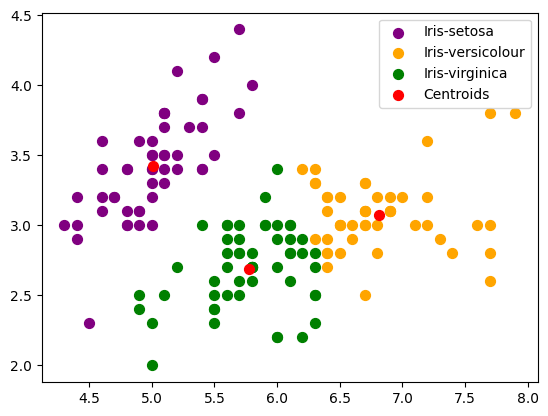

In [21]:
import matplotlib.pyplot as plt
#Visualising the clusters
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 50, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(Kmean.cluster_centers_[:, 0], Kmean.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')

plt.legend()

### Elbow method

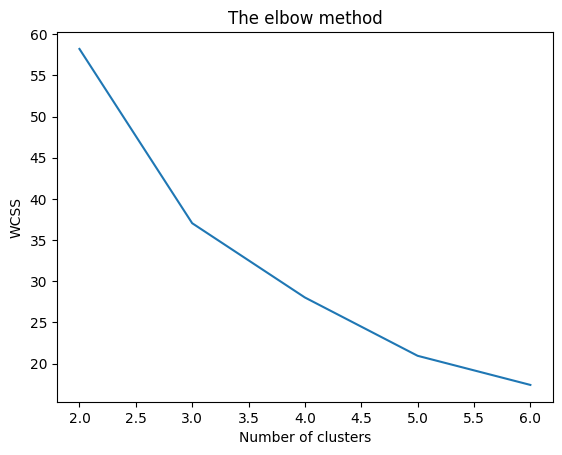

In [22]:
# Elbow method를 통해 최적의 클러스터 갯수를 결정할 수 있다.
WCSS = [] # WCSS = Within-Cluster Sum of Squares , K평균 군집에서 군집의 퀄리티를 평가할때 사용되는 척도


for k in range(2, 7):
    model = KMeans(n_clusters = k, max_iter = 300, n_init = 10, random_state = 42)
    model.fit(X)
    WCSS.append(model.inertia_) # inertia_를통해 elbow method 실행 가능


plt.plot(range(2, 7), WCSS)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

최적 군집수는 시각적으로 사용자가 판단하게 되는 데, X축에 따라 Y축의 감소율이 크게 작아지는 **3**(이를 팔꿈치(elbow)라 함)을 선택하게 된다. 이는 elbow의 선택은 주관적일 수 있음을 의미하며 경우에 따라서는 날카로운 팔꿈치가 없을 수 도 있는 단점이 존재한다.